In [204]:
#Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pylab as py

In [205]:
##Read the data

data = pd.read_csv("h1b_kaggle.csv")
len(data)

3002458

In [4]:
##Check for missing values and output the percentage

##Check for missing values
miss = data.isnull().sum()
den = data.count()
per = (100*miss)/den
per

Unnamed: 0            0.000000
CASE_STATUS           0.000433
EMPLOYER_NAME         0.001965
SOC_NAME              0.594159
JOB_TITLE             0.001432
FULL_TIME_POSITION    0.000500
PREVAILING_WAGE       0.002831
YEAR                  0.000433
WORKSITE              0.000000
lon                   3.704111
lat                   3.704111
dtype: float64

In [206]:
##Lets deal with the missing values in case_status variable
data['CASE_STATUS'].isnull().sum()
##There are 13 missing values in CASE_STATUS. LEts see what they are
data[data['CASE_STATUS'].isnull()]
##Since all the variables in in these 13 instances are null, we can remove them.
data.drop(data.index[3002445 :  3002458], inplace = True)

In [207]:
##Create a new category called unknown to denote missing values
data[data['EMPLOYER_NAME'].isnull()]
data.SOC_NAME.replace(np.NaN, 'Unknown', inplace=True)
data.EMPLOYER_NAME.replace(np.NaN, 'Unknown', inplace=True)
data.JOB_TITLE.replace(np.NaN, 'Unknown', inplace=True)
data.FULL_TIME_POSITION.replace(np.NaN, 'Unknown', inplace=True)

In [208]:
##Salary missing values are substituted with mean of salary
data['PREVAILING_WAGE'] = data['PREVAILING_WAGE'].fillna(data['PREVAILING_WAGE'].mean())

In [209]:
## Drop latitude and longitude columns
data.drop(['lon','lat'],axis=1,inplace=True)

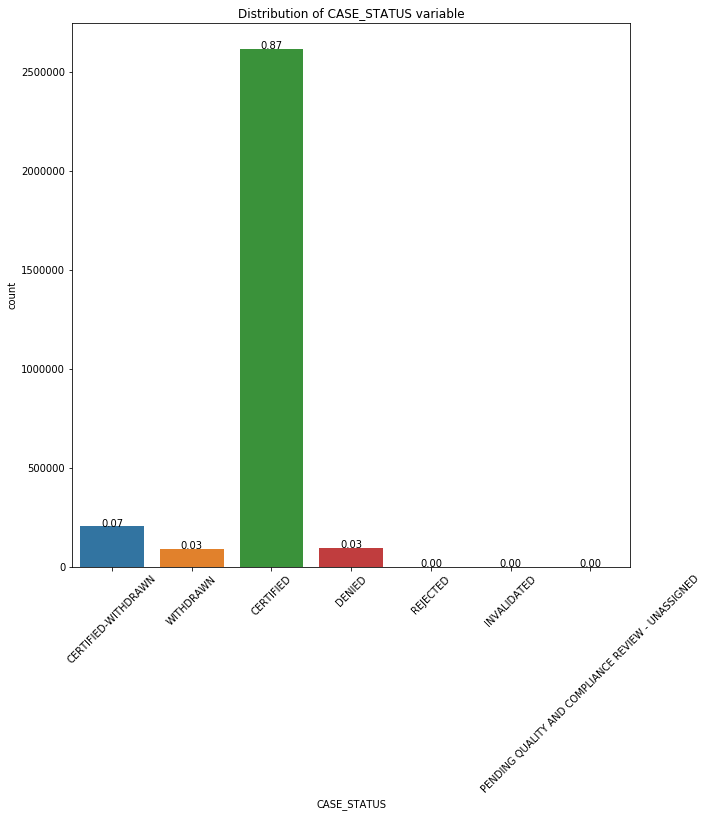

In [71]:
##Lets start the data analysis now. Start with the CASE_STATUS variable
##Plot the distribution of case_status
fig = plt.subplots(figsize=(10,10)) 
g = sns.countplot('CASE_STATUS',data=data)
plt.title("Distribution of CASE_STATUS variable")
plt.xticks(rotation=45)
total = float(len(data))
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

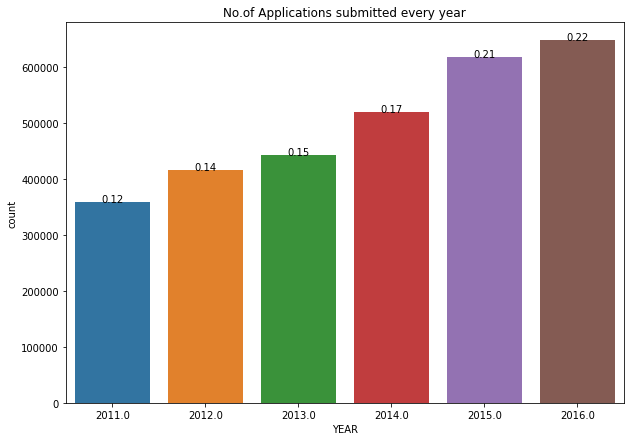

In [28]:
##Plot the distribution of applications vs year.
fig = plt.subplots(figsize=(10,7)) 
h = sns.countplot('YEAR',data=data)
plt.title("No.of Applications submitted every year")
total = float(len(data))
for p in h.patches:
    height = p.get_height()
    h.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

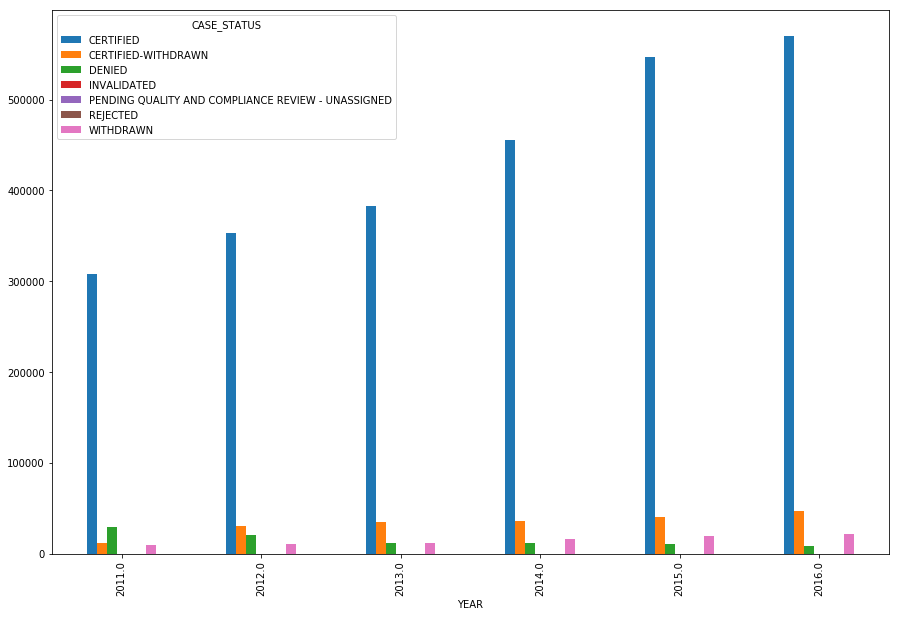

In [88]:
##No of applications certified and rejected by year.
g1 = data.groupby(['YEAR','CASE_STATUS'])
i = g1.size().unstack().plot(kind='bar', figsize=[15,10])


In [155]:
##Breakdown of top 10 companies according to the applications filed and case status
j = pd.DataFrame(data['EMPLOYER_NAME'].value_counts()[:10])
j.reset_index(level=0,inplace=True)
j.columns = ['EMPLOYER_NAME','TOTAL']
j1 = j['EMPLOYER_NAME'].tolist()

In [156]:
j2 = data[data.EMPLOYER_NAME.isin(j1)]

In [164]:
j3 = j2[j2['CASE_STATUS']=='CERTIFIED']

In [158]:
j

,EMPLOYER_NAME,TOTAL
0,INFOSYS LIMITED,130592
1,TATA CONSULTANCY SERVICES LIMITED,64726
2,WIPRO LIMITED,48117
3,DELOITTE CONSULTING LLP,36742
4,IBM INDIA PRIVATE LIMITED,34219
5,ACCENTURE LLP,33447
6,MICROSOFT CORPORATION,25576
7,"HCL AMERICA, INC.",22678
8,ERNST & YOUNG U.S. LLP,18232
9,COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,17528


In [190]:
j4 = pd.DataFrame(j3['EMPLOYER_NAME'].value_counts())
j4.reset_index(level=0,inplace=True)
j4.columns = ['Employer','certified']
j['Certified'] = j4['certified']
j['RATIO'] = 0


,EMPLOYER_NAME,TOTAL,Certified,RATIO
0,INFOSYS LIMITED,130592,129916,0
1,TATA CONSULTANCY SERVICES LIMITED,64726,64237,0
2,WIPRO LIMITED,48117,43476,0
3,DELOITTE CONSULTING LLP,36742,36120,0
4,IBM INDIA PRIVATE LIMITED,34219,32911,0
5,ACCENTURE LLP,33447,27745,0
6,MICROSOFT CORPORATION,25576,22333,0
7,"HCL AMERICA, INC.",22678,22234,0
8,ERNST & YOUNG U.S. LLP,18232,17874,0
9,COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,17528,15202,0


C:\Users\MITHUN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0.5,1,'Ratio of applications certified to total filed')

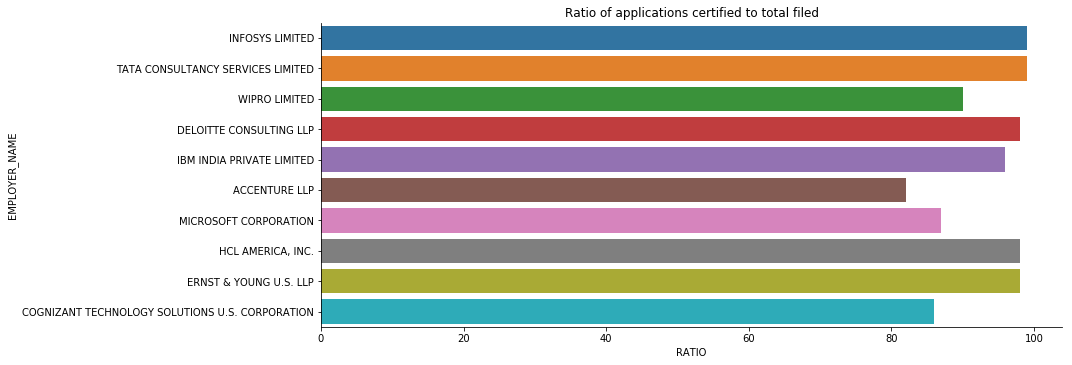

In [193]:
for i in range(len(j)):
    j['RATIO'][i] = 100.0 * j['Certified'][i]/j['TOTAL'][i]
j
sns.factorplot(x='RATIO',y='EMPLOYER_NAME',kind='bar',data=j,aspect=3,size=5)
plt.title("Ratio of applications certified to total filed")

In [79]:
#Consider the applications which are CERTIFIED. Let's understand the distributions of those applications.
certified = data[data.CASE_STATUS == 'CERTIFIED']
certified

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
18,19,CERTIFIED,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,Y,187200.00,2016.0,"SANTA CLARA, CALIFORNIA"
19,20,CERTIFIED,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",Y,241842.00,2016.0,"ALEXANDRIA, VIRGINIA"
22,23,CERTIFIED,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,Y,99986.00,2016.0,"SAN DIEGO, CALIFORNIA"
23,24,CERTIFIED,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,99986.00,2016.0,"CHULA VISTA, CALIFORNIA"
25,26,CERTIFIED,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,Y,187200.00,2016.0,"SANTA CLARA, CALIFORNIA"
27,28,CERTIFIED,HELLO INC.,CHIEF EXECUTIVES,CHIEF BUSINESS OFFICER,Y,215862.00,2016.0,"SAN FRANCISCO, CALIFORNIA"
28,29,CERTIFIED,UMBEL CORP,CHIEF EXECUTIVES,VICE PRESIDENT OF ENGINEERING,Y,192088.00,2016.0,"AUSTIN, TEXAS"
29,30,CERTIFIED,"PERSPECTIVES OF FREEDOM FOUNDATION, INC",CHIEF EXECUTIVES,EXECUTIVE DIRECTOR,Y,95295.98,2016.0,"WESTON, FLORIDA"
30,31,CERTIFIED,GTH INC.,CHIEF EXECUTIVES,"VICE PRESIDENT, BUSINESS DEVELOPMENT",Y,149594.00,2016.0,"WASHINGTON, DISTRICT OF COLUMBIA"
31,32,CERTIFIED,THE KRAFT HEINZ COMPANY,CHIEF EXECUTIVES,HEAD OF US SALES,Y,226699.00,2016.0,"CHICAGO, ILLINOIS"


Text(0.5,1,'Top 15 employers with certified applications')

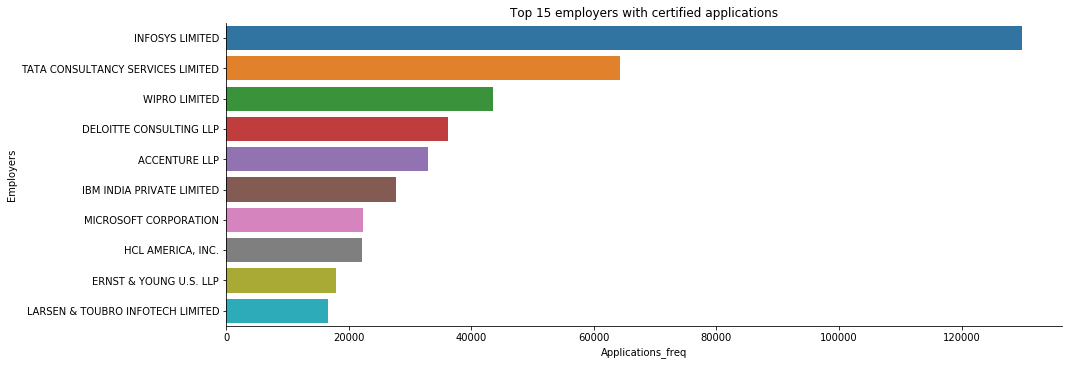

In [82]:
#Top 15 employers
emp_cert = pd.DataFrame(certified['EMPLOYER_NAME'].value_counts()[:10])
emp_cert.reset_index(level=0,inplace=True)
emp_cert.columns = ['Employers','Applications_freq']
j=sns.factorplot(x='Applications_freq',y='Employers',data=emp_cert,kind='bar',aspect=3,size=5)
plt.title("Top 15 employers with certified applications")

In [11]:
## Lets consider the top 2 employers and break down their statistics
# Infosys limited
infosys = certified[certified['EMPLOYER_NAME']=='INFOSYS LIMITED']

In [92]:
j_info = pd.DataFrame(infosys['JOB_TITLE'].value_counts()[:5])
w_info = pd.DataFrame(infosys['WORKSITE'].value_counts()[:5])
salary_bin = [0,30000,50000,75000,100000,150000]
s_info = pd.DataFrame(pd.cut(infosys['PREVAILING_WAGE'],salary_bin,include_lowest=True))

In [107]:
a_info = pd.DataFrame(s_info['PREVAILING_WAGE'].value_counts())
a_info.reset_index(level=0,inplace=True)
a_info.columns=['WageBucket','Frequency']

In [109]:
j_info.reset_index(level=0,inplace=True)
j_info.columns = ['Job Title','Frequency']
w_info.reset_index(level=0,inplace=True)
w_info.columns = ['Worksite','Frequency']

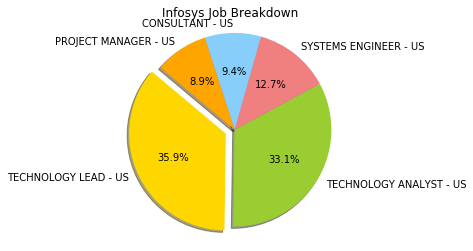

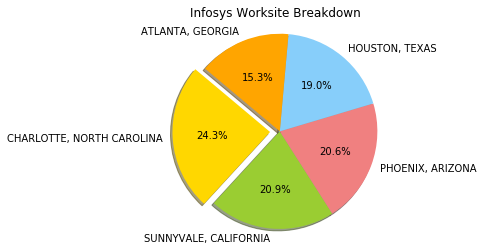

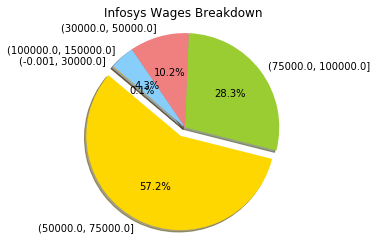

In [203]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

#-----------------------------------------------------------------------
# Data to plot
labels = j_info['Job Title'].tolist()
sizes = j_info['Frequency'].tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("Infosys Job Breakdown")
plt.show()

#--------------------------------------------------------------------------
labels2 = w_info['Worksite'].tolist()
sizes2 = w_info['Frequency'].tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes2, explode=explode, labels=labels2, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("Infosys Worksite Breakdown")
plt.show()

#------------------------------------------------------------------------------
# Data to plot
labels3 = a_info['WageBucket'].tolist()
sizes3 = a_info['Frequency'].tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
 
# Plot

plt.pie(sizes3, explode=explode, labels=labels3, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("Infosys Wages Breakdown")
plt.show()
#--------------------------------------------------------------------------------


In [64]:
tata=certified[certified['EMPLOYER_NAME']=='TATA CONSULTANCY SERVICES LIMITED']

In [120]:
j_tata = pd.DataFrame(tata['JOB_TITLE'].value_counts()[:5])
w_tata = pd.DataFrame(tata['WORKSITE'].value_counts()[:5])
s_tata = pd.DataFrame(pd.cut(tata['PREVAILING_WAGE'],salary_bin,include_lowest=True))

In [121]:
j_tata.reset_index(level=0,inplace=True)
j_tata.columns = ['Job Title','Frequency']
w_tata.reset_index(level=0,inplace=True)
w_tata.columns = ['Worksite','Frequency']
a_tata = pd.DataFrame(s_tata['PREVAILING_WAGE'].value_counts())
a_tata.reset_index(level=0,inplace=True)
a_tata.columns=['WageBucket','Frequency']

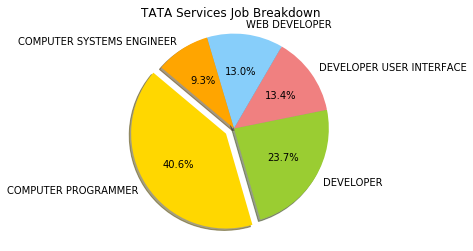

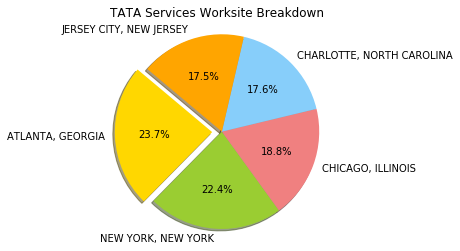

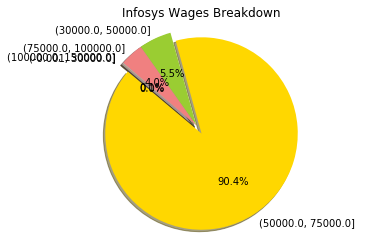

In [122]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = j_tata['Job Title'].tolist()
sizes = j_tata['Frequency'].tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice

#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("TATA Services Job Breakdown")
plt.show()
#----------------------------------------------------------------------------------------
labels = w_tata['Worksite'].tolist()
sizes = w_tata['Frequency'].tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("TATA Services Worksite Breakdown")
plt.show()
#-------------------------------------------------------------------------------------------
# Data to plot
labels3 = a_tata['WageBucket'].tolist()
sizes3 = a_tata['Frequency'].tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes3, explode=explode, labels=labels3, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("Infosys Wages Breakdown")
plt.show()

Text(0.5,1,'top 15 SOC_NAMEs with certified applications')

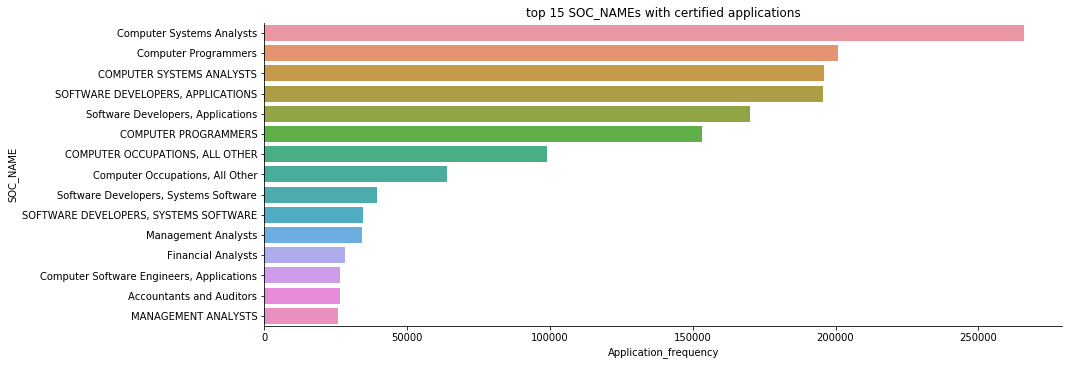

In [243]:
#top 15 soc_names
soc_cert = pd.DataFrame(certified['SOC_NAME'].value_counts()[:15])
soc_cert.reset_index(level=0,inplace=True)
soc_cert.columns= ['SOC_NAME','Application_frequency']
k = sns.factorplot(x='Application_frequency',y='SOC_NAME',data=soc_cert,kind='bar',aspect=3,size=5)
plt.title("top 15 SOC_NAMEs with certified applications")

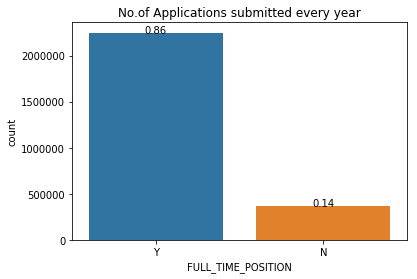

In [65]:
##full-time position distribution
l = sns.countplot(x='FULL_TIME_POSITION',data=certified)
plt.title("No.of Applications submitted every year")
total = float(len(certified))
for p in l.patches:
    height = p.get_height()
    l.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

In [200]:
s = certified['PREVAILING_WAGE'].quantile([0.25,0.50,0.75,0.99])
s

0.25     54766.0
0.50     65125.0
0.75     81432.0
0.99    159099.0
Name: PREVAILING_WAGE, dtype: float64

Text(0.5,0,'Salary (in USD)')

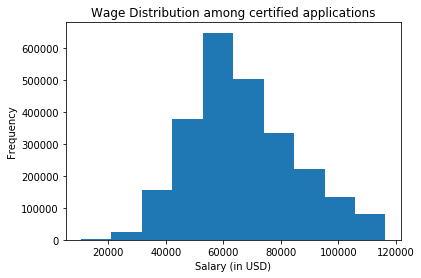

In [195]:
##Wage distribution of certified applications
q = certified['PREVAILING_WAGE'].quantile(0.95)
r = certified[certified['PREVAILING_WAGE'] < q]
r['PREVAILING_WAGE'].plot('hist')
plt.title("Wage Distribution among certified applications")
plt.xlabel('Salary (in USD)')


Text(0.5,1,'Regions with highest number of applications certified')

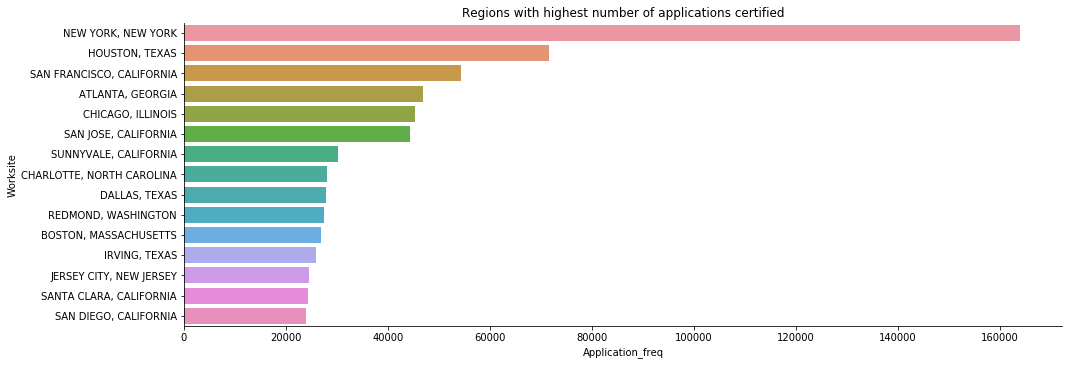

In [240]:
##Top 20 worksites
work_cert = pd.DataFrame(certified['WORKSITE'].value_counts()[:15])
work_cert.reset_index(level=0,inplace=True)
work_cert.columns = ['Worksite','Application_freq']
m = sns.factorplot(x='Application_freq',y='Worksite',kind='bar',data=work_cert,aspect=3,size=5)
plt.title("Regions with highest number of applications certified")


In [76]:
##Lets consider the applications which have been denied
denied = data[data['CASE_STATUS']=='DENIED']

Text(0.5,1,'Companies with highest number of denied applications')

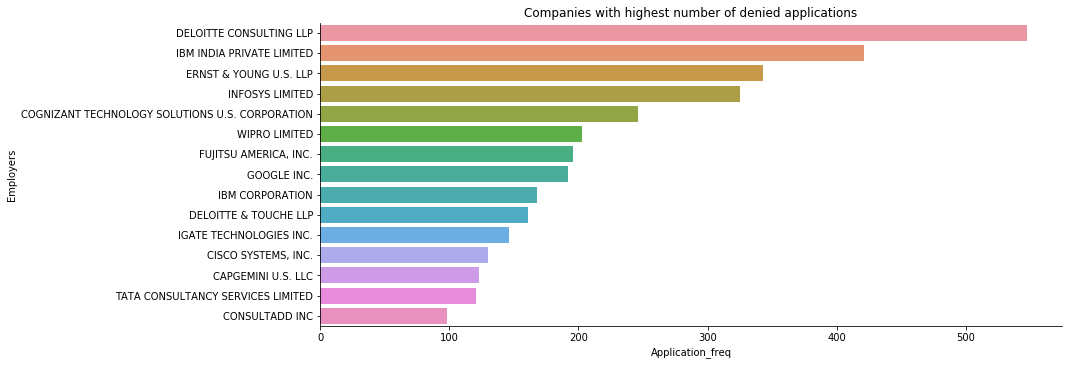

In [244]:
##Top 15 employers
emp_denied = pd.DataFrame(denied['EMPLOYER_NAME'].value_counts()[:15])
emp_denied.reset_index(level=0,inplace=True)
emp_denied.columns = ['Employers','Application_freq']
q = sns.factorplot(x='Application_freq',y='Employers',kind='bar',data=emp_denied,aspect=3,size=5)
plt.title("Companies with highest number of denied applications")

Text(0.5,1,'Top 20 JOB TITLES which occupy rejected applications')

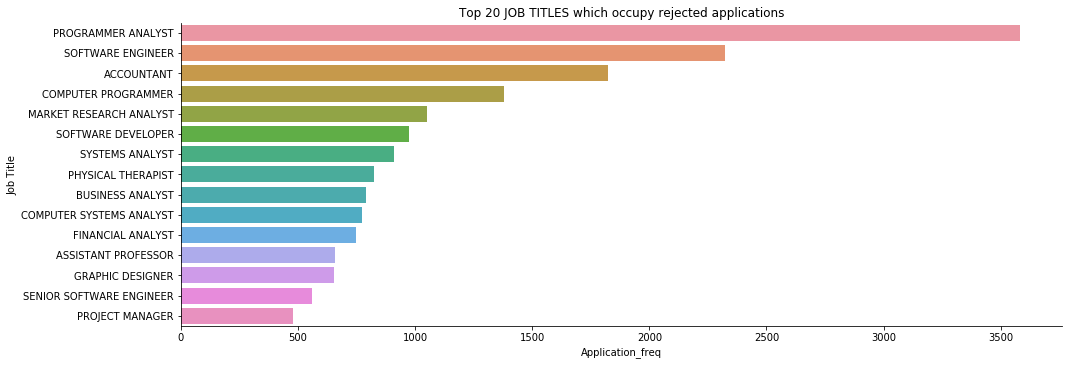

In [245]:
##Top 20 job titles
job_denied = pd.DataFrame(denied['JOB_TITLE'].value_counts()[:15])
job_denied.reset_index(level=0,inplace=True)
job_denied.columns = ['Job Title','Application_freq']
r = sns.factorplot(x='Application_freq',y='Job Title',kind='bar',data=job_denied,aspect=3,size=5)
plt.title("Top 20 JOB TITLES which occupy rejected applications")

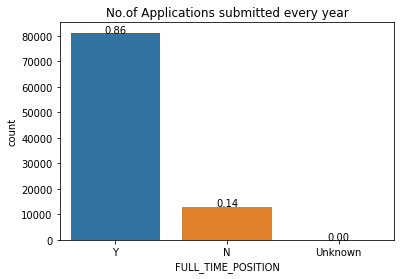

In [132]:
##Full time position distribution
s = sns.countplot(x='FULL_TIME_POSITION',data=denied)
plt.title("No.of Applications submitted every year")
total = float(len(denied))
for p in s.patches:
    height = p.get_height()
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

Text(0.5,0,'Salary (in USD)')

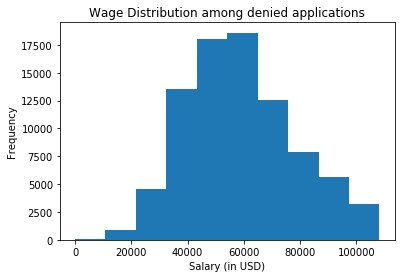

In [78]:
#Wage distribution
q = denied['PREVAILING_WAGE'].quantile(0.90)
r = denied[denied['PREVAILING_WAGE'] < q]
r['PREVAILING_WAGE'].plot('hist')
plt.title("Wage Distribution among denied applications")
plt.xlabel('Salary (in USD)')

Text(0.5,1,'Worksite with highest number of denied applications')

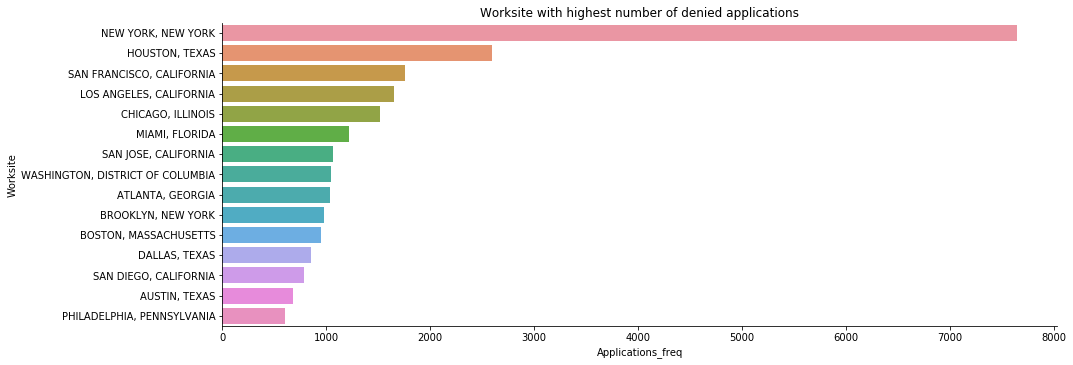

In [270]:
#Worksite
work_denied = pd.DataFrame(denied['WORKSITE'].value_counts()[:15])
work_denied.reset_index(level=0,inplace=True)
work_denied.columns = ['Worksite','Applications_freq']
t = sns.factorplot(x='Applications_freq',y='Worksite',kind='bar',data=work_denied,aspect=3,size=5)
plt.title("Worksite with highest number of denied applications")

In [68]:
## Top Wage earners distribution
## Let's understand the distribution of applications with highest wages offered.
sal_high = data.sort_values(by='PREVAILING_WAGE',ascending=False)[:300]
sal_high

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
2163248,2163249,DENIED,"GUARDIAN HEALTHCARE PROVIDERS, INC.",Physical Therapists,PHYSICAL THERAPISTS,Y,6.997607e+09,2013.0,"PEKIN, ILLINOIS"
2797982,2797983,DENIED,"SCIVANTAGE, INC.",Computer Programmers,SOFTWARE DEVELOPER,Y,1.007814e+09,2011.0,"JERSEY CITY, NEW JERSEY"
1673867,1673868,DENIED,DISCOVER PRODUCTS INC.,Statisticians,PROJECT MANAGER,Y,8.201323e+08,2014.0,"RIVERWOODS, ILLINOIS"
1819718,1819719,DENIED,"IDEXCEL, INC.","Software Developers, Applications",.NET DEVELOPER,Y,7.099999e+08,2013.0,"COLUMBUS, OHIO"
2775906,2775907,DENIED,COMMONHEALTH ACTION,Medical and Health Services Managers,PROGRAM MANAGER (POSITIVE PATHWAYS),Y,6.579000e+08,2011.0,"WASHINGTON, NA"
1547574,1547575,DENIED,ARKRIT LLC,Computer Systems Analysts,PROGRAMMER/ANALYST,Y,6.169317e+08,2014.0,"SAN JOSE, CALIFORNIA"
1668384,1668385,DENIED,HOWARD HUGHES MEDICAL INSTITUTE,"Life Scientists, All Other",RESEARCH ASSOCIATE,Y,4.134726e+08,2014.0,"ASHBURN, VIRGINIA"
1805875,1805876,DENIED,GOOGLE INC.,Architectural and Engineering Managers,"MANAGER, SOFTWARE ENGINEERING",Y,4.103154e+08,2013.0,"MOUNTAIN VIEW, CALIFORNIA"
2796071,2796072,WITHDRAWN,ICAP CORPORATES LLC,Financial Managers,"MANAGING DIRECTOR, EQUITY DERIVATIVES",Y,4.066379e+08,2011.0,"JERSEY CITY, NEW JERSEY"
1698325,1698326,DENIED,SAN LUIS VALLEY HEALTH,"Internists, General",INTERNIST,Y,3.893760e+08,2014.0,"ALAMOSA, COLORADO"


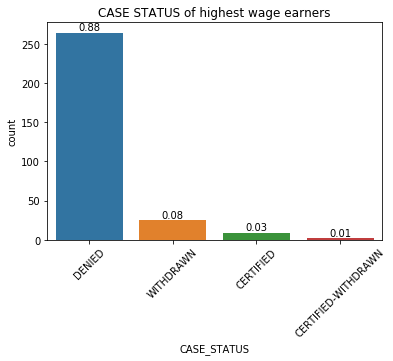

In [177]:

## CASE_STATUS distribution
o = sns.countplot('CASE_STATUS',data=sal_high)
plt.xticks(rotation=45)
plt.title("CASE STATUS of highest wage earners")
total = float(len(sal_high))
for p in o.patches:
    height = p.get_height()
    o.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

Text(0.5,1,'Employers who offered the highest wages')

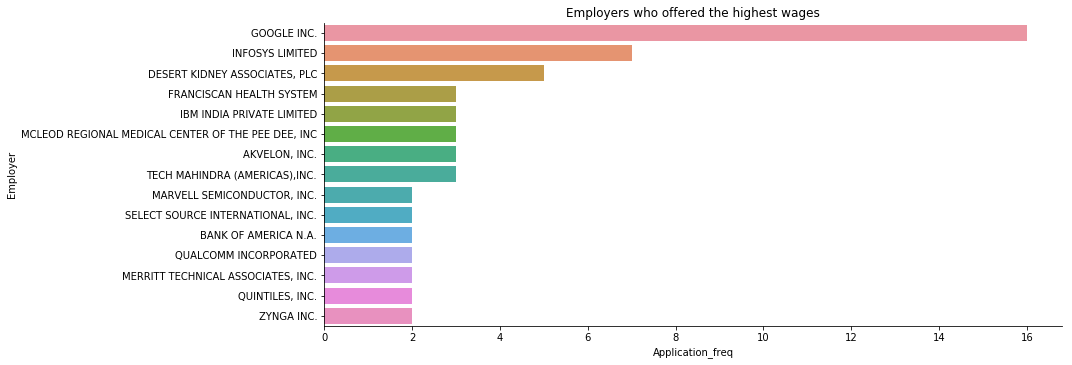

In [271]:
##Employer name distribution
emp_high = pd.DataFrame(sal_high['EMPLOYER_NAME'].value_counts()[:15])
emp_high.reset_index(level=0, inplace=True)
emp_high.columns= ['Employer', 'Application_freq']
r = sns.factorplot(x='Application_freq',y='Employer',kind='bar',data=emp_high,aspect=3,size=5)
plt.title("Employers who offered the highest wages")
##How to add case_status as a stack on top of this plot??

Text(0.5,1,'Jobs which are offered the highest wages')

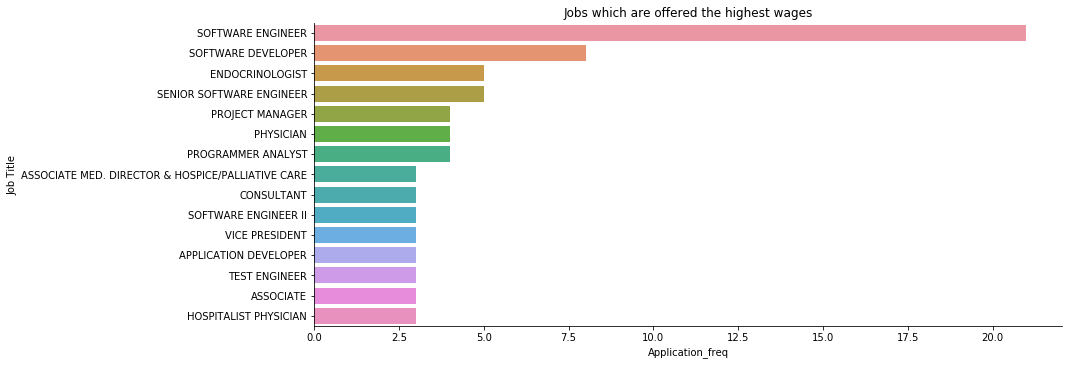

In [272]:
##Job title distribution
job_high = pd.DataFrame(sal_high['JOB_TITLE'].value_counts()[:15])
job_high.reset_index(level=0, inplace=True)
job_high.columns= ['Job Title', 'Application_freq']
t = sns.factorplot(x='Application_freq',y='Job Title',kind='bar',data=job_high,aspect=3,size=5)
plt.title('Jobs which are offered the highest wages')

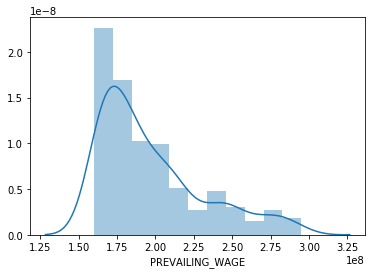

In [74]:
##Wage distribution

q = sal_high["PREVAILING_WAGE"].quantile(0.90)
r = sal_high[sal_high['PREVAILING_WAGE'] < q]
sns.distplot(r['PREVAILING_WAGE'])

In [228]:
##DATA SCIENTIST
##Lets us consider all the applications whose job title is data scientist
ds = data[data['JOB_TITLE']=='DATA SCIENTIST']
ds

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
12612,12613,CERTIFIED,"BENEFITFOCUS.COM, INC.",COMPUTER AND INFORMATION SYSTEMS MANAGERS,DATA SCIENTIST,Y,104333.0,2016.0,"CHARLESTON, SOUTH CAROLINA"
34498,34499,CERTIFIED,"GLOBAL TOUCHPOINTS, INC. DUNS# 13-8058305",MANAGEMENT ANALYSTS,DATA SCIENTIST,N,64168.0,2016.0,"DORAL, FLORIDA"
45982,45983,CERTIFIED,"THE NIELSEN COMPANY (US), LLC",MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,DATA SCIENTIST,N,64563.0,2016.0,"SAN RAMON, CALIFORNIA"
46270,46271,CERTIFIED,"THE NIELSEN COMPANY (US), LLC",MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,DATA SCIENTIST,Y,70096.0,2016.0,"SAN FRANCISCO, CALIFORNIA"
48664,48665,CERTIFIED,"RELAYRIDES, INC.",MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,DATA SCIENTIST,Y,90106.0,2016.0,"SAN FRANCISCO, CALIFORNIA"
49007,49008,CERTIFIED,"BOOMERANG COMMERCE, INC.",MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,DATA SCIENTIST,Y,84573.0,2016.0,"MOUNTAIN VIEW, CALIFORNIA"
49477,49478,CERTIFIED,SCL USA INC.,MARKET RESEARCH ANALYSTS AND MARKETING SPECIAL...,DATA SCIENTIST,Y,75982.0,2016.0,"ALEXANDRIA, VIRGINIA"
76196,76197,CERTIFIED-WITHDRAWN,"AMERICAN SAVINGS BANK, FSB","FINANCIAL SPECIALISTS, ALL OTHER",DATA SCIENTIST,Y,71947.0,2016.0,"HONOLULU, HAWAII"
76948,76949,CERTIFIED,APPLIED DATA FINANCE LLC,"FINANCIAL SPECIALISTS, ALL OTHER",DATA SCIENTIST,N,60528.0,2016.0,"SAN DIEGO, CALIFORNIA"
76960,76961,CERTIFIED-WITHDRAWN,APPLIED DATA FINANCE LLC,"FINANCIAL SPECIALISTS, ALL OTHER",DATA SCIENTIST,N,60528.0,2016.0,"SAN DIEGO, CALIFORNIA"


In [225]:
##Total number of applications for data scientist
len(ds)

1932

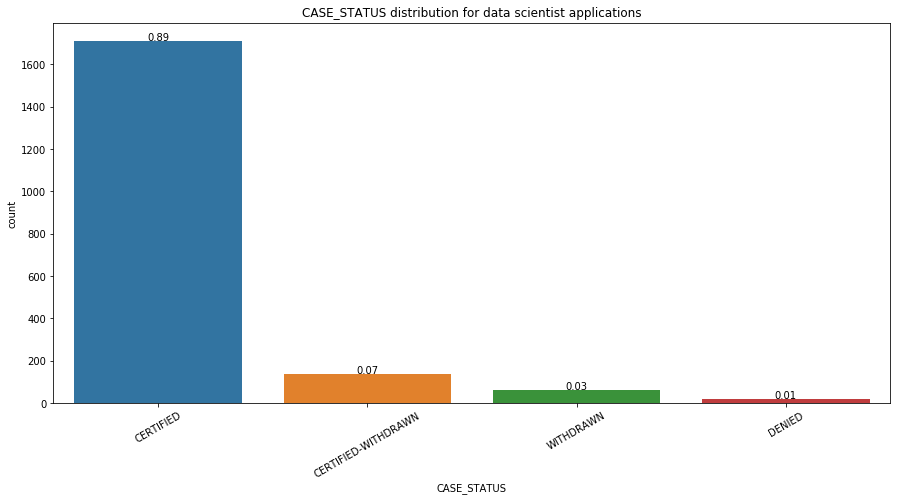

In [223]:
##CASE_STATUS distribution
plt.subplots(figsize=(15,7))
plt.title("CASE_STATUS distribution for data scientist applications")
plt.xticks(rotation=30)
u = sns.countplot('CASE_STATUS',data=ds)
total = float(len(ds))
for p in u.patches:
    height = p.get_height()
    u.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

Text(0.5,1,'Employers with most number of applications for data scientist')

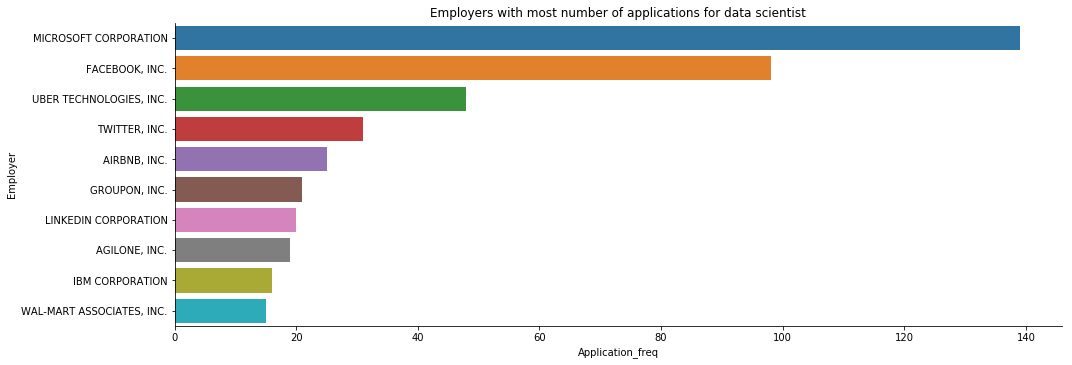

In [273]:
##Employers with most number of applications for data scientist
emp_ds = pd.DataFrame(ds['EMPLOYER_NAME'].value_counts()[:10])
emp_ds.reset_index(level=0,inplace=True)
emp_ds.columns = ['Employer','Application_freq']
v = sns.factorplot(x='Application_freq',y='Employer',kind='bar',data=emp_ds,aspect=3,size=5)
plt.title("Employers with most number of applications for data scientist")

Text(0.5,1,'Employers offering the highest wages for data scientist')

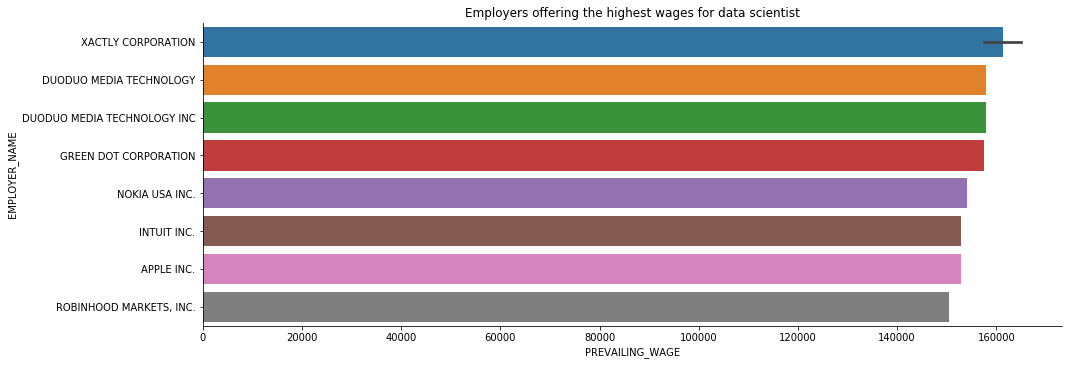

In [274]:
##Employers offering the highest wages for data scientist
ds1 = ds.sort_values(by='PREVAILING_WAGE',ascending=False)[:10]
w = sns.factorplot(x='PREVAILING_WAGE',y='EMPLOYER_NAME',data=ds1,kind='bar',aspect=3,size=5)
plt.title("Employers offering the highest wages for data scientist")

Text(0.5,0,'Salary (in USD)')

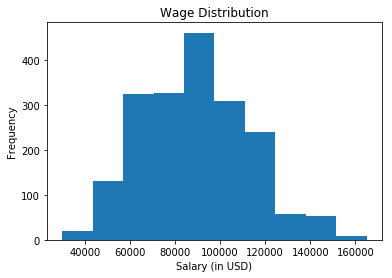

In [236]:
##Wage distribution of the data scientists
ds['PREVAILING_WAGE'].plot('hist')
plt.title("Wage Distribution")
plt.xlabel("Salary (in USD)")

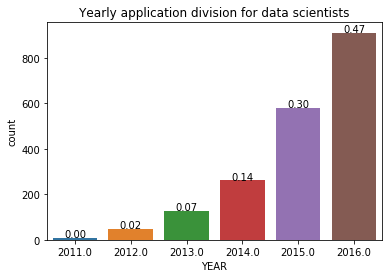

In [275]:
##Yearly application division
w = sns.countplot('YEAR',data=ds)
plt.title("Yearly application division for data scientists")
total = float(len(ds))
for p in w.patches:
    height = p.get_height()
    w.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

Text(0.5,1,'Worksites with highest number of data scientist application')

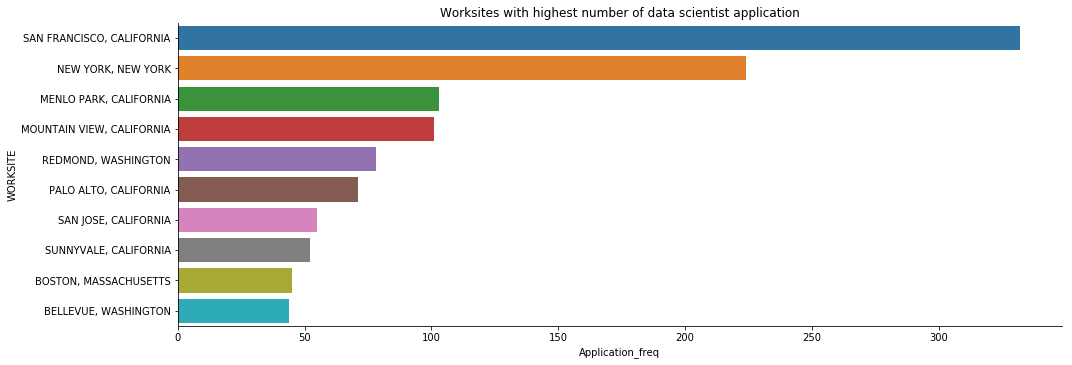

In [276]:
##Worksites with highest number of data scientist application
work_ds = pd.DataFrame(ds['WORKSITE'].value_counts()[:10])
work_ds.reset_index(level=0,inplace=True)
work_ds.columns = ['WORKSITE','Application_freq']
x = sns.factorplot(x='Application_freq',y='WORKSITE',kind='bar',data=work_ds,aspect=3,size=5)
plt.title("Worksites with highest number of data scientist application")

In [36]:
work_wage = data.groupby(['WORKSITE'], as_index=False)['PREVAILING_WAGE'].mean()

In [43]:
work_wage = pd.DataFrame(work_wage)

In [44]:
work_wage.columns

Index(['index', 'WORKSITE', 'PREVAILING_WAGE'], dtype='object')

In [63]:
y = work_wage.sort_values(by="PREVAILING_WAGE", ascending=False)[1:16]
y

,index,WORKSITE,PREVAILING_WAGE
15200,15200,"SOMERSET, NEW YORK",1.263309e+08
12704,12704,"PEKIN, ILLINOIS",9.095134e+07
3535,3535,"CITY, CALIFORNIA",7.280000e+07
11002,11002,"MOUNTAIN VIEW, ILLINOIS",7.008897e+07
17266,17266,"W READING, PENNSYLVANIA",6.677737e+07
3583,3583,"CLAVERACK, NEW YORK",5.380321e+07
3162,3162,"CENTREVILLE, DISTRICT OF COLUMBIA",5.326215e+07
2653,2653,"BURLINGTON, COLORADO",5.015630e+07
16203,16203,"SUITE 500, VIRGINIA",4.997014e+07
4177,4177,"CRYSTAL CITY, MISSOURI",4.338511e+07


Text(0.5,6.8,'Wages (in million USD)')

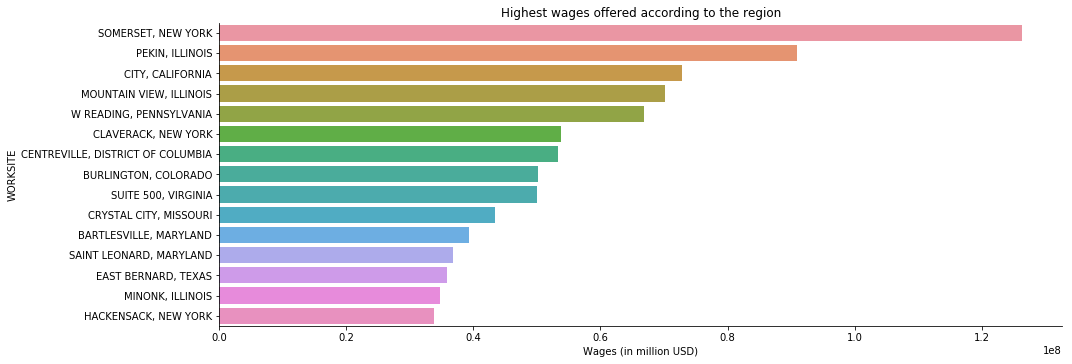

In [64]:
sns.factorplot(x='PREVAILING_WAGE',y='WORKSITE',kind='bar',data=y,aspect=3,size=5)
plt.title("Highest wages offered according to the region")
plt.xlabel('Wages (in million USD)')

In [55]:
z = work_wage.sort_values(by="PREVAILING_WAGE", ascending=False)[-18:-3]
z 

,index,WORKSITE,PREVAILING_WAGE
11018,11018,"MOUTH OF WILSON, NORTH CAROLINA",16900.000000
11019,11019,"MOUTH OF WILSON, VIRGINIA",16900.000000
7979,7979,"IRVING, KANSAS",16848.000000
12452,12452,"P.O. BOX 502471, NA",16800.000000
14308,14308,"SAINT JAMES, LOUISIANA",16786.000000
17935,17935,"WEST YELLOWSTONE, MONTANA",16744.000000
15133,15133,"SMITHFIELD, PENNSYLVANIA",16740.000000
11877,11877,"NORTH SPRINGFIELD, PENNSYLVANIA",16702.000000
6721,6721,"GRAND SALINE, TEXAS",16640.000000
10136,10136,"MEDINA, TEXAS",16474.000000


Text(0.5,6.8,'Wages (in thousand USD)')

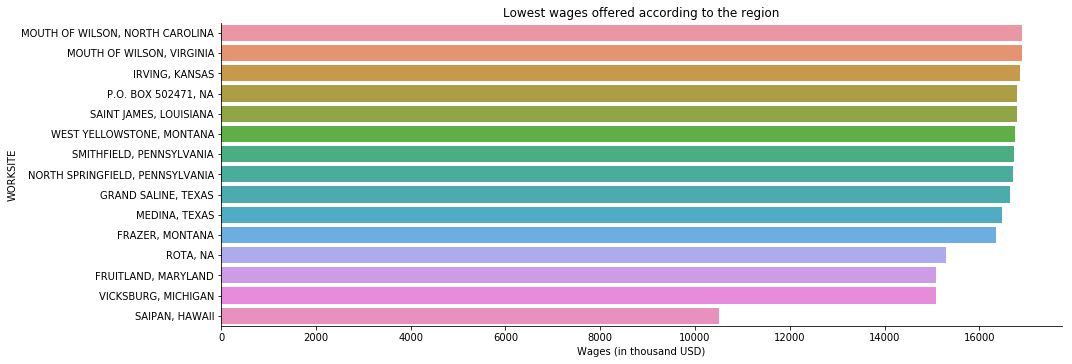

In [56]:
sns.factorplot(x='PREVAILING_WAGE',y='WORKSITE',kind='bar',data=z,aspect=3,size=5)
plt.title("Lowest wages offered according to the region")
plt.xlabel('Wages (in thousand USD)')

In [237]:
emp_wage = data.groupby(['EMPLOYER_NAME','PREVAILING_WAGE','JOB_TITLE'])

In [238]:
emp1 = pd.DataFrame(emp_wage.size())

In [239]:
emp1.reset_index(inplace=True)

In [245]:
emp2 = emp1.sort_values(by='PREVAILING_WAGE',ascending=False)[:10]
emp2

,EMPLOYER_NAME,PREVAILING_WAGE,JOB_TITLE,0
597329,"GUARDIAN HEALTHCARE PROVIDERS, INC.",6.997607e+09,PHYSICAL THERAPISTS,1
1243375,"SCIVANTAGE, INC.",1.007814e+09,SOFTWARE DEVELOPER,1
418777,DISCOVER PRODUCTS INC.,8.201323e+08,PROJECT MANAGER,1
688851,"IDEXCEL, INC.",7.099999e+08,.NET DEVELOPER,1
317122,COMMONHEALTH ACTION,6.579000e+08,PROGRAM MANAGER (POSITIVE PATHWAYS),1
125980,ARKRIT LLC,6.169317e+08,PROGRAMMER/ANALYST,1
648966,HOWARD HUGHES MEDICAL INSTITUTE,4.134726e+08,RESEARCH ASSOCIATE,1
585165,GOOGLE INC.,4.103154e+08,"MANAGER, SOFTWARE ENGINEERING",1
683410,ICAP CORPORATES LLC,4.066379e+08,"MANAGING DIRECTOR, EQUITY DERIVATIVES",1
1220695,SAN LUIS VALLEY HEALTH,3.893760e+08,INTERNIST,1


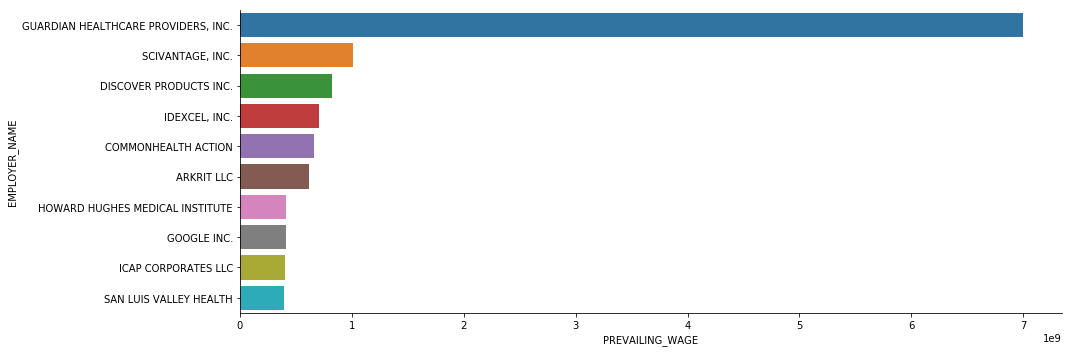

In [244]:
sns.factorplot(x='PREVAILING_WAGE',y='EMPLOYER_NAME',kind='bar',data=emp2,aspect=3,size=5)